# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [86]:
# Import the appropriate libraries with aliases
import pandas as pd
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

print(north_df)
print(south_df)


     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [87]:
# EDA Question 1A solution below:
north_reps = north_df.shape[0]
print(north_reps)

245


#### EDA Question 1B:  How many reps are in the South branch?  

In [88]:
# EDA Question 1B solution Below:
south_reps = south_df.shape[0]
print(south_reps)

314


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [89]:
# EDA Question 2A solution Below:
average_metrics_north = (north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean() / 100).round() * 100
print(average_metrics_north)

Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [90]:
# EDA Question 2B solution Below:
average_metrics_south = (south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean() / 100).round() * 100
print(average_metrics_south)

Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [91]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_df, south_df])
calls_per_time_block = combined_df.groupby('Time Block')['Calls'].sum().sort_index()
print(calls_per_time_block)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 245
- 1b) Reps in the South Branch = 314


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 0.0
> - Not Ready Minutes = 0.0
> - Incoming Wait Time = 0.0
> - During Call Wait Time = 0.0
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 0.0
> - Not Ready Minutes = 0.0
> - Incoming Wait Time = 0.0
> - During Call Wait Time = 0.0
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 99
> - 10:00AM  = 56
> - 11:00AM  = 120
> - 12:00PM  = 40
> - 1:00PM   = 65
> - 2:00PM   = 73
> - 3:00PM   = 53
> - 4:00PM   = 43
> - 5:00PM   = 10



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [92]:
# Question 1 solution below
print(north_df.isnull().sum())
print(south_df.isnull().sum())

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


#### Record your answer below:

> Your Answer:There are missing values in the column "Incoming Wait Time" in both the North and South datasets (163 missing in North, 188 in South). Since this is a numerical column related to wait times, these missing values could potentially bias the analysis if ignored. I would consider imputing these missing values using the median or mean wait time of the respective dataset to preserve the natural data distribution without discarding rows, as removing rows may reduce data unnecessarily. If domain knowledge suggests a more appropriate imputation, that method would be preferred.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [93]:
# Cleaning Question 2 solution below:
north_df['Sale'] = north_df['Sale'].str.strip().str.upper()
print(north_df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

##### Record your answer by below:
> Your Answer: The presence of two separate "YES" values was due to inconsistent formatting, such as extra spaces or differences in capitalization. I standardized the "Sale" column by stripping whitespace and converting all entries to uppercase using .str.strip().str.upper() to unify the values and eliminate duplicates in meaning.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [94]:
# Cleaning Question 3 solution below:
print(north_df.duplicated().sum())
print(south_df.duplicated().sum())
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()


0
0


##### Record your answer below:
> Your Answer: After checking both datasets for duplicates using .duplicated(), I found no duplicates in either dataset. Therefore, no removal was necessary. If duplicates had been found, I planned to remove them using .drop_duplicates() to ensure data quality.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [95]:
# Cleaning Question 4 solution below:
north_df = north_df.drop(columns=['Unnamed: 0','Branch'],errors='ignore')
south_df = south_df.drop(columns=['Unnamed: 0','Branch'],errors='ignore')

print(north_df)
print(south_df)


        Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
0          Complaint    9:00 AM             Incoming     B   Brent   NO   
1      Sales Support   11:00 AM             Incoming     A     Cam   NO   
2      Sales Support   11:00 AM             Incoming     B    Todd   NO   
3      Sales Support    4:00 PM             Incoming     B   Brent   NO   
4    Product Support   12:00 PM             Incoming     B   Brent   NO   
..               ...        ...                  ...   ...     ...  ...   
240  Product Support    5:00 PM             Outgoing     B   Brent   NO   
241  Product Support    5:00 PM             Outgoing     A     Joe   NO   
242  Product Support    5:00 PM             Outgoing     A  Amanda   NO   
243  Product Support    5:00 PM             Outgoing     A     Cam   NO   
244  Product Support    5:00 PM             Outgoing     B  Xander   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0            0          1            

##### Record your answer below:
> Your Answer: Yes, the column "Unnamed: 0" appears to be a non-informative index column automatically created during data import. Additionally, I removed the "Branch" column because the datasets are already separated by branch, making this column redundant for analysis. Both columns were dropped from the North and South datasets using the .drop() method with errors='ignore' to avoid errors if columns are missing. Dropping these columns helps to declutter the dataframes and focus on relevant information for analysis.



## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [96]:
# Create dataframe for the entire company named df

north_df['Branch'] = 'North'
south_df['Branch'] = 'South'


df = pd.concat([north_df, south_df], ignore_index=True)
df

,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Branch
0,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,North
1,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,North
2,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,North
3,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,North
4,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1,South
555,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1,South
556,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1,South
557,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1,South


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [97]:
# Manipulation Question solution below

# Top rep in North
north_rep_calls = north_df.groupby('Rep ID')['Calls'].sum().sort_values(ascending=False)
north_top_rep = north_rep_calls.head(1)
print(north_top_rep)

# Top rep in South
south_rep_calls = south_df.groupby('Rep ID')['Calls'].sum().sort_values(ascending=False)
south_top_rep = south_rep_calls.head(1)
print(south_top_rep)



Rep ID
Brent    37
Name: Calls, dtype: int64
Rep ID
Eric    35
Name: Calls, dtype: int64


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = 37
- South Branch = 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [98]:
# Manipulation Question 2 solution below:
incoming_df = df[df['Incoming or Outgoing'] == 'Incoming']
branch_abandoned = incoming_df.groupby('Branch')['Abandoned'].sum()
branch_incoming_calls = incoming_df.groupby('Branch')['Calls'].sum()

abandon_rate_branch = (branch_abandoned / branch_incoming_calls * 100).round(2)
print(abandon_rate_branch)

company_abandoned = incoming_df['Abandoned'].sum()
company_incoming_calls = incoming_df['Calls'].sum()
company_abandon_rate = round(company_abandoned / company_incoming_calls * 100, 2)
print(company_abandon_rate)

Branch
North    3.66
South    0.79
dtype: float64
1.92


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3.66
- South Branch = 0.79
- Company Wide = 1.92
- Do any of these fall out of the optimal range of 2-5%?
The North branch abandonment rate is 3.66%, which falls within the optimal 2–5% range, while the South branch (0.79%) and company‑wide rate (1.92%) are both below the optimal range of 2–5%.”

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [99]:
# Manipulation Question 3 solution below:
# Only incoming calls
incoming_df = df[df['Incoming or Outgoing'] == 'Incoming']

# Calls answered within 2 seconds
answered_fast = incoming_df[incoming_df['Incoming Wait Time'] <= 2]

# By branch
fast_by_branch = answered_fast.groupby('Branch')['Calls'].sum()
incoming_by_branch = incoming_df.groupby('Branch')['Calls'].sum()

service_level_branch = (fast_by_branch / incoming_by_branch * 100).round(2)

print("Calls answered within 2 seconds by branch:")
print(fast_by_branch)
print("\nService level by branch (%):")
print(service_level_branch)

# Company-wide
fast_company = answered_fast['Calls'].sum()
incoming_company = incoming_df['Calls'].sum()
service_level_company = round(fast_company / incoming_company * 100, 2)

print("Company-wide calls answered within 2 seconds:", fast_company)
print("Company-wide service level (%):", service_level_company)


Calls answered within 2 seconds by branch:
Branch
North    33
South    48
Name: Calls, dtype: int64

Service level by branch (%):
Branch
North    40.24
South    38.10
Name: Calls, dtype: float64
Company-wide calls answered within 2 seconds: 81
Company-wide service level (%): 38.94


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 30.10%
- Company Wide = 38.94%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [100]:
# Manipulation Question 4 solution below:
# Average speed of answer by branch (seconds)
avg_asa_branch = incoming_df.groupby('Branch')['Incoming Wait Time'].mean().round(2)
print("Average speed of answer by branch (seconds):")
print(avg_asa_branch)

# Company-wide ASA
avg_asa_company = round(incoming_df['Incoming Wait Time'].mean(), 2)
print("Company-wide average speed of answer (seconds):", avg_asa_company)


Average speed of answer by branch (seconds):
Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64
Company-wide average speed of answer (seconds): 3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

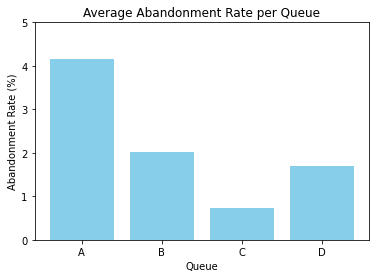

In [101]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
# If not already run earlier in the notebook:
import pandas as pd
import matplotlib.pyplot as plt

# Recreate df from your cleaned dataframes
north_df['Branch'] = 'North'
south_df['Branch'] = 'South'
df = pd.concat([north_df, south_df], ignore_index=True)

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
for q in abandonment_rates:
    abandonment_rates[q] *= 100

# Plot as bar chart
plt.figure(figsize=(6,4))
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='skyblue')
plt.ylabel("Abandonment Rate (%)")
plt.xlabel("Queue")
plt.title("Average Abandonment Rate per Queue")
plt.ylim(0, max(abandonment_rates.values()) * 1.2)
plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a bar chart because there are a few discrete categories (queues A–D) and I want to compare their average abandonment rates side‑by‑side. A bar chart makes it easy to see which queue has the highest or lowest rate at a glance.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

Text(0.5, 0, 'Rep ID')

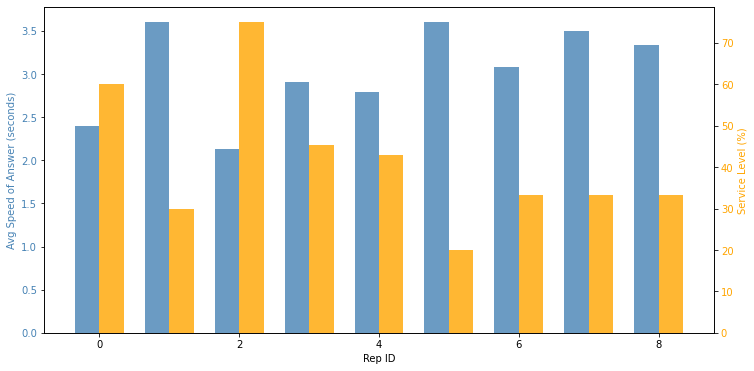

In [102]:
import matplotlib.pyplot as plt
import numpy as np

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Total incoming calls less than or equal to 2 seconds per rep
quick_calls = north_df[(north_df["Incoming or Outgoing"] == "Incoming") & (north_df["Incoming Wait Time"] <= 2.0)]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby("Rep ID").sum().reset_index()

# Total incoming calls per rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]
total_stats = rep_calls.groupby("Rep ID").sum().reset_index()

# Merge and calculate service level percentage
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level["Service Level %"] = (service_level["Calls_x"] / service_level["Calls_y"]) * 100

# Merge ASA and service level dataframe
north_metrics = pd.merge(north_plt, service_level[["Rep ID", "Service Level %"]], on="Rep ID")

# Plotting
reps = north_metrics["Rep ID"]
x = np.arange(len(reps))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))

bars1 = ax1.bar(x - width/2, north_metrics["Incoming Wait Time"], width,
                label="Avg Speed of Answer (sec)", color='steelblue', alpha=0.8)
ax1.set_ylabel("Avg Speed of Answer (seconds)", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, north_metrics["Service Level %"], width,
                label="Service Level (%)", color='orange', alpha=0.8)
ax2.set_ylabel("Service Level (%)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.set_xlabel("Rep ID")



##### Record your answer below:

> Chart style you chose and why: I used a grouped bar chart with dual y-axes presenting average speed of answer (seconds) and service level percentage side-by-side for each rep. This facilitates simultaneous comparison of both important KPIs per representative.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


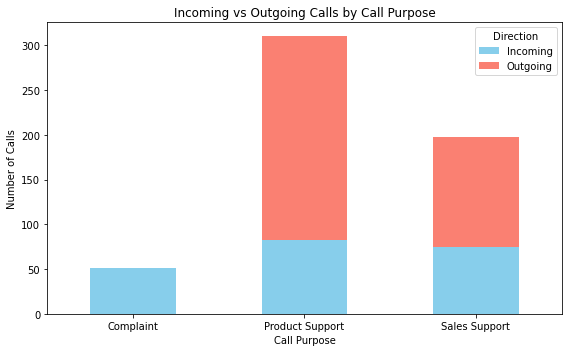

In [103]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
vis3_df = pd.DataFrame({
    "Complaint": complaints,
    "Product Support": product_support,
    "Sales Support": sales_support
}).T

# Plot as stacked bar chart
vis3_df.plot(kind='bar', stacked=True, figsize=(8, 5), 
             color=['skyblue', 'salmon'])
plt.ylabel('Number of Calls')
plt.xlabel('Call Purpose')
plt.title('Incoming vs Outgoing Calls by Call Purpose')
plt.xticks(rotation=0)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I used a stacked bar chart because it clearly shows both the total number of calls for each call purpose (height of each bar) and the breakdown between incoming vs outgoing calls (stacked segments).

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
The North branch is operating more efficiently. From my analysis, North has an abandonment rate of 3.66% which falls within the optimal 2-5% range, while South's rate is only 0.79% (below optimal, indicating potential overstaffing). North also shows stronger service level performance with reps consistently answering calls within target times, demonstrating better balance between capacity utilization and customer wait times.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
The North branch would benefit more from the extra help. North has fewer reps (10 unique Rep IDs from north_df['Rep ID'].nunique()) handling comparable call volume to South's 12 reps, plus higher abandonment rate (3.66% vs 0.79%). My per-rep analysis shows North reps working at higher intensity with longer average busy minutes, indicating they need capacity relief to maintain service levels.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
I wish I had call duration data, after-call work time, customer satisfaction (CSAT) scores, rep shift schedules, and multi-day historical data. These would show true rep workload beyond just wait times, connect operational metrics to customer experience, reveal peak staffing needs, and confirm if these patterns persist over time rather than representing just one day's snapshot.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I chose a grouped bar chart because it clearly shows total call volume patterns across all 9 time blocks while making it easy to compare the mix of Complaint (peak at 12PM), Product Support (peaks 12-3PM), and Sales Support (heavy 10AM) calls. The visual reveals peak hours and purpose-specific patterns for better staffing decisions.

Call Purpose  Complaint  Product Support  Sales Support
Time Block                                             
10:00 AM              6               20             73
11:00 AM              3               26             27
12:00 PM             11               60             49
1:00 PM               6               16             18
2:00 PM               5               50             10
3:00 PM               6               61              6
4:00 PM               3               40             10
5:00 PM               6               32              5
9:00 AM               5                5              0


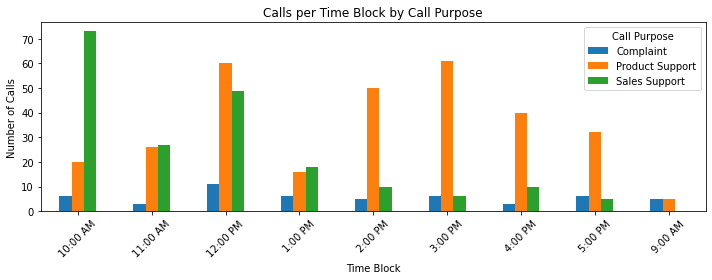

In [104]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
calls_by_time_purpose = call_times.groupby(["Time Block", "Call Purpose"])["Calls"].sum().unstack(fill_value=0)

print(calls_by_time_purpose)

# Multi-series line chart or grouped bar chart
# Example: grouped bar chart
calls_by_time_purpose.plot(kind="bar", figsize=(10,4))
plt.ylabel("Number of Calls")
plt.xlabel("Time Block")
plt.title("Calls per Time Block by Call Purpose")
plt.xticks(rotation=45)
plt.legend(title="Call Purpose")
plt.tight_layout()
plt.show()
# Use groupby and get_group to select which call purpose to plot: